# Examining the 2016 Trump Vote Using Logistic Regression

<font size=3> Which voter characteristics predict the decision to vote for Donald Trump or not in 2016? <br><br>
 
Data from the 2016 <b> Cooperative Congressional Election Study (CCES) </b> were used to address this question. The CCES data contain responses from over 50,000 respondents.  I have already re-coded all of the variables used in the analysis.  The dependent variable trump_vote is a dummy variable, coded 1 if the respondent voted for Trump and 0 otherwise. Dummy variables were also used for party identification, evangelical, and race. <br><br>

Below, I use pairwise deletion to account for missing values, divide the data into training and testing sets, I then estimate a Logistic Regression model using scikit learn.   
    

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cces = pd.read_csv("C:\\Users\matth\Desktop\CCES\cces.csv")

pd.DataFrame(cces)


cces.dropna(axis=0, inplace=True)
y = cces['trump_vote'].values
x = cces.drop('trump_vote', axis=1).values

X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=0.25, random_state=3) 

logit = LogisticRegression(random_state=4)

logit.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluating Model Performance

### The Confusion Matrix

In [14]:

#Confusion Matrix and AUC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_predict = logit.predict(X_test)
print(confusion_matrix(y_test, y_predict))


[[5970  643]
 [1385 3307]]


###  Classification Report

In [6]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      6613
         1.0       0.84      0.70      0.77      4692

    accuracy                           0.82     11305
   macro avg       0.82      0.80      0.81     11305
weighted avg       0.82      0.82      0.82     11305



The model accurately predicts the outcome on 82% of the test data.

### AUC Score

In [11]:
print("The AUC is", round(roc_auc_score(y_test, y_predict), 4))

The AUC is 0.8038


### ROC Curve

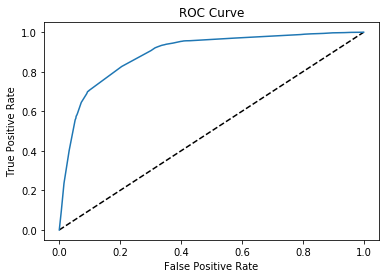

In [15]:
#ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


y_pred_prob = logit.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Logistic Regression in statsmodels

Alternatively, Logistic Regression model of the Trump Vote could be estimated in statsmodels, which provides a traditional regression table, useful statistics, and measures of model fit, such as the Log Likelihood Ratio and pseudo R^2.

In [19]:
#Estimate with statsmodels
import statsmodels.api as sm

x_cols = sm.add_constant(cces).drop('trump_vote', axis=1)

logit = sm.Logit(cces['trump_vote'], x_cols)
vote_choice = logit.fit()
print(vote_choice.summary())

Optimization terminated successfully.
         Current function value: 0.396081
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             trump_vote   No. Observations:                45218
Model:                          Logit   Df Residuals:                    45210
Method:                           MLE   Df Model:                            7
Date:                Fri, 28 Aug 2020   Pseudo R-squ.:                  0.4162
Time:                        18:47:40   Log-Likelihood:                -17910.
converged:                       True   LL-Null:                       -30678.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8613      0.051    -16.956      0.000      -0.961      -0.762
republican     2.0778      0.